Título: Voronoi Binning

Data: 23/03/2020
    
Obj: Aplicar o algoritmo de Voronoi para aumentar a razão sinal/ruído em spaxes que possam ser aglotinados. Baseado no código de Michele Cappellari: The Voronoi binning method (VorBin) disponível em: https://www-astro.physics.ox.ac.uk/~mxc/software/#binning e descrito em https://ui.adsabs.harvard.edu/abs/2003MNRAS.342..345C

Autor: Carlos Roberto

In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

import vorbin
from vorbin.voronoi_2d_binning import voronoi_2d_binning

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/New pPXF/"

Bin-accretion...
1  /  31
2  /  31
3  /  31
4  /  31
5  /  31
6  /  31
7  /  31
8  /  31
9  /  31
10  /  31
11  /  31
12  /  31
13  /  31
14  /  31
15  /  31
16  /  31
17  /  31
18  /  31
19  /  31
20  /  31
21  /  31
22  /  31
23  /  31
24  /  31
25  /  31
26  /  31
27  /  31
28  /  31
29  /  31
30  /  31
31  /  31
32  /  31
33  /  31
34  /  31
33  initial bins.
Reassign bad bins...
28  good bins.
Unbinned pixels:  2  /  547
Fractional S/N scatter (%): 27.045863182682535
Elapsed time accretion: 0.10 seconds
Elapsed time optimization: 0.00 seconds


/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


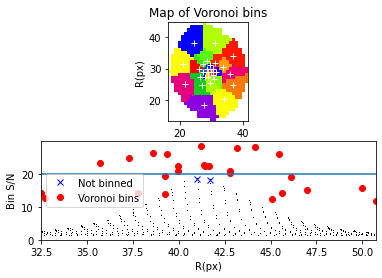

In [2]:
#y: é a posição y de onde foi extraído o sinal e o ruído
#x: é a posição x de onde foi extraído o sinal e o ruído
#signal: é o sinal do spaxel (y,x)
#noise: é o ruído do spaxel (y,x)

y, x, signal, noise = np.loadtxt("GoodPixels.txt").T #Lê a saída do código SNR
targetSN = 20 #Threshold pretendido

    # Perform the actual computation. The vectors
    # (binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale)
    # are all generated in *output*
    #
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning(x, y, signal, 
                                                                          noise, targetSN, plot=1, quiet=0, wvt=False, cvt=False)

    # Save to a text file the initial coordinates of each pixel together
    # with the corresponding bin number computed by this procedure.
    # binNum uniquely specifies the bins and for this reason it is the only
    # number required for any subsequent calculation on the bins.
    #
np.savetxt('Voronoi_OutPut.txt', np.column_stack([y, x, binNum]),header="y_px \t x_px \t Vorbin_Id", fmt=b'%10.6f %10.6f %8i')
plt.subplot(211)
plt.xlabel('R(px)')
plt.ylabel('R(px)')
plt.subplot(212)
plt.xlabel('R(px)')
plt.savefig(data_folder+'Data/Voronoi_20/Vorbin.png', format='png')

#Essas são as novas posições dos spaxels binnados

#print(xBar)
#print(yBar)

In [19]:
(xNode - 29)*0.2

array([ 0.        ,  0.        , -0.2       , -0.3       , -0.5       ,
       -0.375     , -1.45490196, -1.6       , -0.55      , -0.1       ,
       -0.33333333, -0.27341772,  0.1       ,  0.97692308,  0.33333333,
        0.3       ,  0.2       , -0.8746988 ,  0.1       ,  0.3       ,
       -0.1       ,  0.5       ,  1.57826087,  1.36      ,  0.4       ,
        0.925     ,  0.396     ,  1.56666667])

In [20]:
(yNode - 29)*0.2

array([ 0.        , -0.3       , -0.3       ,  0.        , -0.3       ,
       -0.825     , -0.76078431,  0.46222222,  0.2       ,  0.2       ,
        0.46666667, -2.0835443 , -0.7       , -1.70384615, -0.46666667,
       -0.2       ,  0.        ,  1.78313253,  0.4       ,  0.2       ,
        0.7       ,  0.        , -0.82608696, -0.12      ,  0.55      ,
        0.275     ,  1.82      ,  0.97575758])